In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(4000,7000,0.001)
t_x = np.arange(4000,7000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2)  
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2)/np.sqrt(2*np.pi*del_lam_i**2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

In [178]:
files = os.listdir("/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/")
files

['ngc6886_2400s.0051.txt',
 '.DS_Store:Zone.Identifier',
 '.DS_Store',
 'fit_beta.py:Zone.Identifier',
 'ngc6886_2400s.0026.txt:Zone.Identifier',
 'fit_alpha.py:Zone.Identifier',
 'ngc6886_2400s.0051.txt:Zone.Identifier',
 'fortran',
 'ngc6886_2400s.0026.txt',
 'fit_alpha.py',
 'fit_beta.py']

In [110]:
NGC6741_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
NGC6884_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
NGC6886_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
NGC6881_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
H4_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/H_4_1.txt"
Hen2_447_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hen_2_447.txt"
Hu2_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hu_2_1.txt"
J900_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/J_900.txt"
M1_8_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/M_1_8.txt"
NGC2346_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2346.txt"
NGC2392_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2392.txt"
NGC3242_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_3242.txt"

In [121]:
direct = r"/home/jin/cloudy_Test/parameters"

import os

files = os.listdir(direct)
txt_files = [file for file in files if file.endswith('params.txt')]
# txt_files
parameters_name = [file.split('_')[0] for file in txt_files]

In [122]:
parameters_name

['NGC6881',
 'NGC6884',
 'NGC6886',
 'J900',
 'NGC2392',
 'NGC6741',
 'NGC2346',
 'NGC3242',
 'J900',
 'NGC2392',
 'M1-8',
 'Hu2-1',
 'H4-1',
 'Hen2-447',
 'NGC6886',
 'NGC3242',
 'Hu2-1']

In [123]:
for ii , name in enumerate(parameters_name):
    direct_p = direct + '/' + txt_files[ii]
    name_w = name.replace('-', '_')
    globals()[f'paramter_{name_w}']= pd.read_csv(direct_p,sep='\,',header=0,engine='python')
    globals()[f'F_6527_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[0][1]
    globals()[f'F_6545_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[1][1]
    globals()[f'F_6560_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[2][1]
    globals()[f'F_6563_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[3][1]
    globals()[f'F_6548_1_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[4][1]
    globals()[f'F_6548_2_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[5][1]


    globals()[f'lam_c_6527_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[0][3]
    globals()[f'lam_c_6545_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[1][3]
    globals()[f'lam_c_6560_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[2][3]
    globals()[f'lam_c_6563_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[3][3]
    globals()[f'lam_c_6548_1_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[4][3]
    globals()[f'lam_c_6548_2_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[5][3]


    globals()[f'sig_6527_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[0][4]
    globals()[f'sig_6545_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[1][4]
    globals()[f'sig_6560_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[2][4]
    globals()[f'sig_6563_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[3][4]
    globals()[f'sig_6548_1_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[4][4]
    globals()[f'sig_6548_2_{name_w}'] = globals()[f'paramter_{name_w}'].to_numpy()[5][4]

    header = ['lambda', 'flux']
    globals()[f'path_{name_w}'] = globals()[f'{name_w}_p']
    Real_data = pd.read_csv(globals()[f'path_{name_w}'],sep='\s+',names=header)
    globals()[f'data_lam_{name_w}'],globals()[f'data_flux_{name_w}'] = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()

   

In [113]:
parameters_name

['NGC6881',
 'NGC6884',
 'NGC6886',
 'J900',
 'NGC2392',
 'NGC6741',
 'NGC2346',
 'NGC3242',
 'J900',
 'NGC2392',
 'M1-8',
 'Hu2-1',
 'H4-1',
 'Hen2-447',
 'NGC6886',
 'NGC3242',
 'Hu2-1']

NGC_3242

Text(0, 0.5, 'Flux')

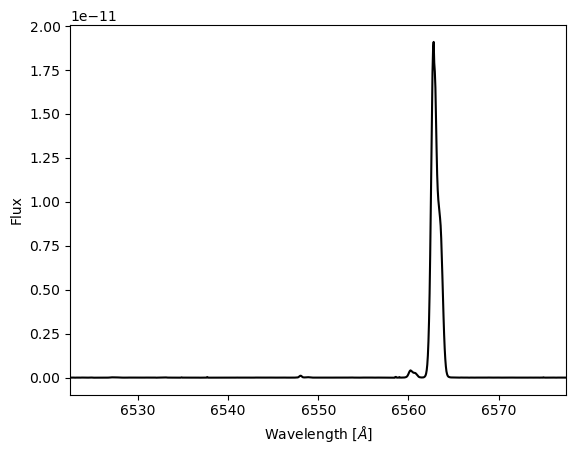

In [117]:
name = 'NGC3242'

x_min,x_max=6525.0,6575.0

FC_indices = (globals()[f'data_lam_{name}'] >= 6520) & (globals()[f'data_lam_{name}'] <= 6530)
FC_flux =globals()[f'data_flux_{name}'][FC_indices]

Fc = np.mean(FC_flux)

plt.plot(globals()[f'data_lam_{name}'],globals()[f'data_flux_{name}'],'k')
x_6527 = np.arange(6510,6530,0.5)

f_6527 = Flux(globals()[f'F_6527_{name}'],x,globals()[f'lam_c_6527_{name}'] ,globals()[f'sig_6527_{name}'],Fc)
f_6560 = Flux(globals()[f'F_6560_{name}'],x,globals()[f'lam_c_6560_{name}'],globals()[f'sig_6560_{name}'],Fc)
# f_6545 = Data_R_Flux(globals()[f'F_6545_{name}'],x,globals()[f'lam_c_6545_{name}'],globals()[f'sig_6545_{name}'],Fc)

f_6563 = Flux(globals()[f'F_6563_{name}'],x,globals()[f'lam_c_6563_{name}'] ,globals()[f'sig_6563_{name}'],Fc)
f_6548_1 = Flux(globals()[f'F_6548_1_{name}'],x,globals()[f'lam_c_6548_1_{name}'] ,globals()[f'sig_6548_1_{name}'],Fc)
f_6548_2 = Flux(globals()[f'F_6548_2_{name}'],x,globals()[f'lam_c_6548_2_{name}'] ,globals()[f'sig_6548_2_{name}'],Fc)
# plt.plot(x,f_6560)
# plt.plot(x,f_6563)
# plt.plot(x,f_6527)
# #eff = 
# f_RCE_eff =R_Flux(F_6560_p,x,F_6545_lam ,F_6560_sigma,ratio_6560,total_f_ratio ,eff,Fc)

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )


x_flux = np.arange(x_min,x_max,0.01)
# f_6545_RD = Data_R_Flux(F_6545_p,x_flux,F_6545_lam,F_6545_sigma,Fc)
eff = 1.0
# f_R_1 =R_Flux(F_6560_p,x_flux,F_6560_lam,F_6560_sigma,ratio_6560,total_f_ratio ,eff,Fc)

# tot_f_ram_1 = total_flux(f_R_1,x_flux,Fc)
# print('Total flux of RCE 1 case is = ',tot_f_ram_1)

# tot_f_obv_ram = total_flux(f_6545_RD,x_flux,Fc)
# print('Total flux of Observed case is = ',tot_f_obv_ram)

# print('RCE of ratio is ', tot_f_obv_ram / tot_f_ram_1)

# eff = tot_f_obv_ram / tot_f_ram_1
# f_Raman =R_Flux(F_6560_p,x,F_6560_lam,F_6560_sigma,ratio_6560,total_f_ratio ,eff,Fc)



# plt.plot(x,f_Raman,'b',lw=3,label=r'RCE$_{}$ = {:.2f}'.format({6545},eff))
# plt.plot(x_6527,f_6527,'y')
# plt.plot(x,f_6545,'r',lw=3,label='Gaussian Fit')


# plt.vlines(F_6527_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
# plt.vlines(F_6527_lam+ del_lam,Fc*0.5,F_6527_p*3 + Fc*0.5,colors='k',linestyles='-.')
plt.xlim(x_min-2.5,x_max+2.5)
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux') #($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)
# plt.xticks(np.linspace(x_min,x_max,6))
# plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)

([<matplotlib.axis.XTick at 0x7ff5b948a890>,
 [Text(6525.0, 0, '6525'),
  Text(6535.0, 0, '6535'),
  Text(6545.0, 0, '6545'),
  Text(6555.0, 0, '6555'),
  Text(6565.0, 0, '6565'),
  Text(6575.0, 0, '6575')])

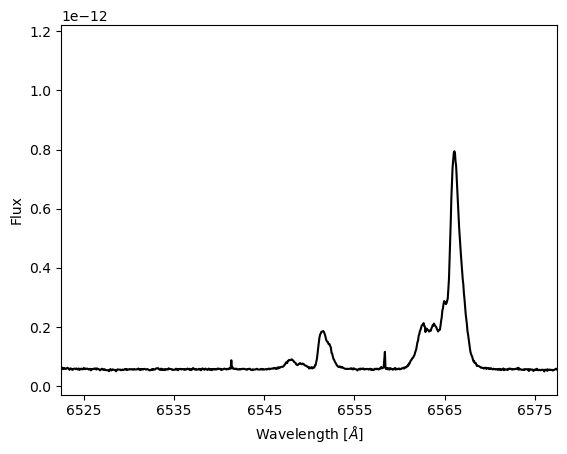

In [116]:
Real_data = pd.read_csv(path_NGC_2392,delim_whitespace=True,names=header)
lam,flux = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy()
plt.plot(lam,flux,'k')

range_indices = (lam >= 6524) & (lam <= 6530)
filtered_flux = flux[range_indices]
max_flux_index_in_filtered = np.argmax(filtered_flux)
original_index = np.where(range_indices)[0][max_flux_index_in_filtered]
F_6527_p = flux[original_index]


range_indices = (lam >= 6524) & (lam <= 6525)
FC_flux = flux[range_indices]
Fc = np.mean(FC_flux)

x_min,x_max=6525.0,6575.0
plt.xlim(x_min-2.5,x_max+2.5)
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Flux') #($10^{-14}$ erg s$^{-1}$ $ \AA^{-1}$)
plt.xticks(np.linspace(x_min,x_max,6))
# plt.ylim(Fc*0.5,F_6527_p*3 + Fc*0.5)

In [139]:
txt_files

['Hen2-447_result.txt',
 'NGC6886_s_result.txt',
 'NGC2346_result.txt',
 'NGC6886_result.txt',
 'NGC6881_result.txt',
 'M1-8_result.txt',
 'NGC2392_result.txt',
 'Hu2-1_s_result.txt',
 'H4-1_result.txt',
 'Hu2-1_result.txt',
 'NGC2392_s_result.txt',
 'NGC6884_result.txt',
 'NGC3242_result.txt',
 'J900_result.txt',
 'J900_s_result.txt',
 'NGC6741_result.txt',
 'NGC3242_s_result.txt']

In [140]:
direct = r"/home/jin/cloudy_Test/parameters"



files = os.listdir(direct)

txt_files = [file for file in files if file.endswith('result.txt')]


parameters_names = []
for file in txt_files:

    parts = file.split('_')

    if len(parts) > 1 and parts[1] == 's':
        parameters_name = parts[0] + parts[1]
    else:
        parameters_name = parts[0]
    
    parameters_names.append(parameters_name)

print(parameters_names)

['Hen2-447', 'NGC6886s', 'NGC2346', 'NGC6886', 'NGC6881', 'M1-8', 'NGC2392', 'Hu2-1s', 'H4-1', 'Hu2-1', 'NGC2392s', 'NGC6884', 'NGC3242', 'J900', 'J900s', 'NGC6741', 'NGC3242s']


In [ ]:
parameter_

In [179]:
for ii , name in enumerate(parameters_names):
    direct_p = direct + '/' + txt_files[ii]
    name_w = name.replace('-', '_')
    
    globals()[f'paramter_{name_w}']= pd.read_csv(direct_p,sep='\,',header=0,engine='python')

    globals()[f'Model_lam_{name_w}'] = globals()[f'paramter_{name_w}']['Wavelength']
    globals()[f'Model_flux_{name_w}'] = globals()[f'paramter_{name_w}']['Flux']

    globals()[f'F_c_{name_w}'] = globals()[f'paramter_{name_w}']['Continuum_Model']

    globals()[f'F_6527_{name_w}'] = globals()[f'paramter_{name_w}']['HeII_6527_Model']
    globals()[f'F_6545_{name_w}'] = globals()[f'paramter_{name_w}']['Raman_HeII_6545_Model']   

    globals()[f'F_6560_{name_w}'] = globals()[f'paramter_{name_w}']['He_6560_Model']
    globals()[f'F_6563_{name_w}'] = globals()[f'paramter_{name_w}']['Ha_6563_Model']
    globals()[f'F_6548_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_1_Model']
    globals()[f'F_6548_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_2_Model']

    # header = ['lambda', 'flux']
    # globals()[f'path_{name_w}'] = globals()[f'{name_w}_p']
    # Real_data = pd.read_csv(globals()[f'path_{name_w}'],sep='\s+',names=header)
    # globals()[f'data_lam_{name_w}'],globals()[f'data_flux_{name_w}'] = Real_data['lambda'].to_numpy() , Real_data['flux'].to_numpy() 

   

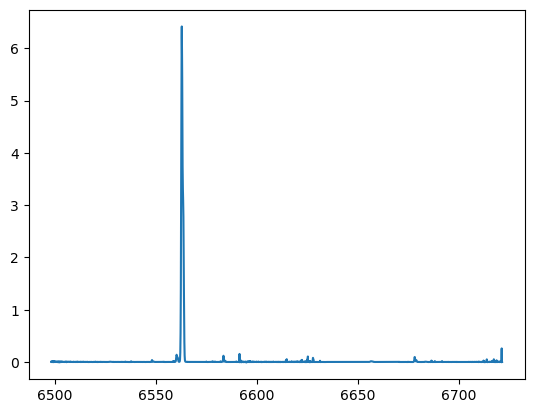

: 

In [180]:
plt.plot(data_lam_NGC3242,data_flux_NGC3242)